In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("/content/admission - admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
chance_of_admit_column = df.iloc[:, 8]
value_counts = chance_of_admit_column.value_counts()
print(value_counts)

0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: Chance of Admit, Length: 61, dtype: int64


In [ ]:
df.shape

(500, 9)

In [ ]:
fig = px.histogram(df, x='GRE Score', nbins=20, title='GRE Score', labels={'GRE Score': 'Gre Score'})
fig.show()

In [ ]:
fig = px.bar(df, x='TOEFL Score', title='TOEFL Score', color='TOEFL Score', template='none')
fig.show()

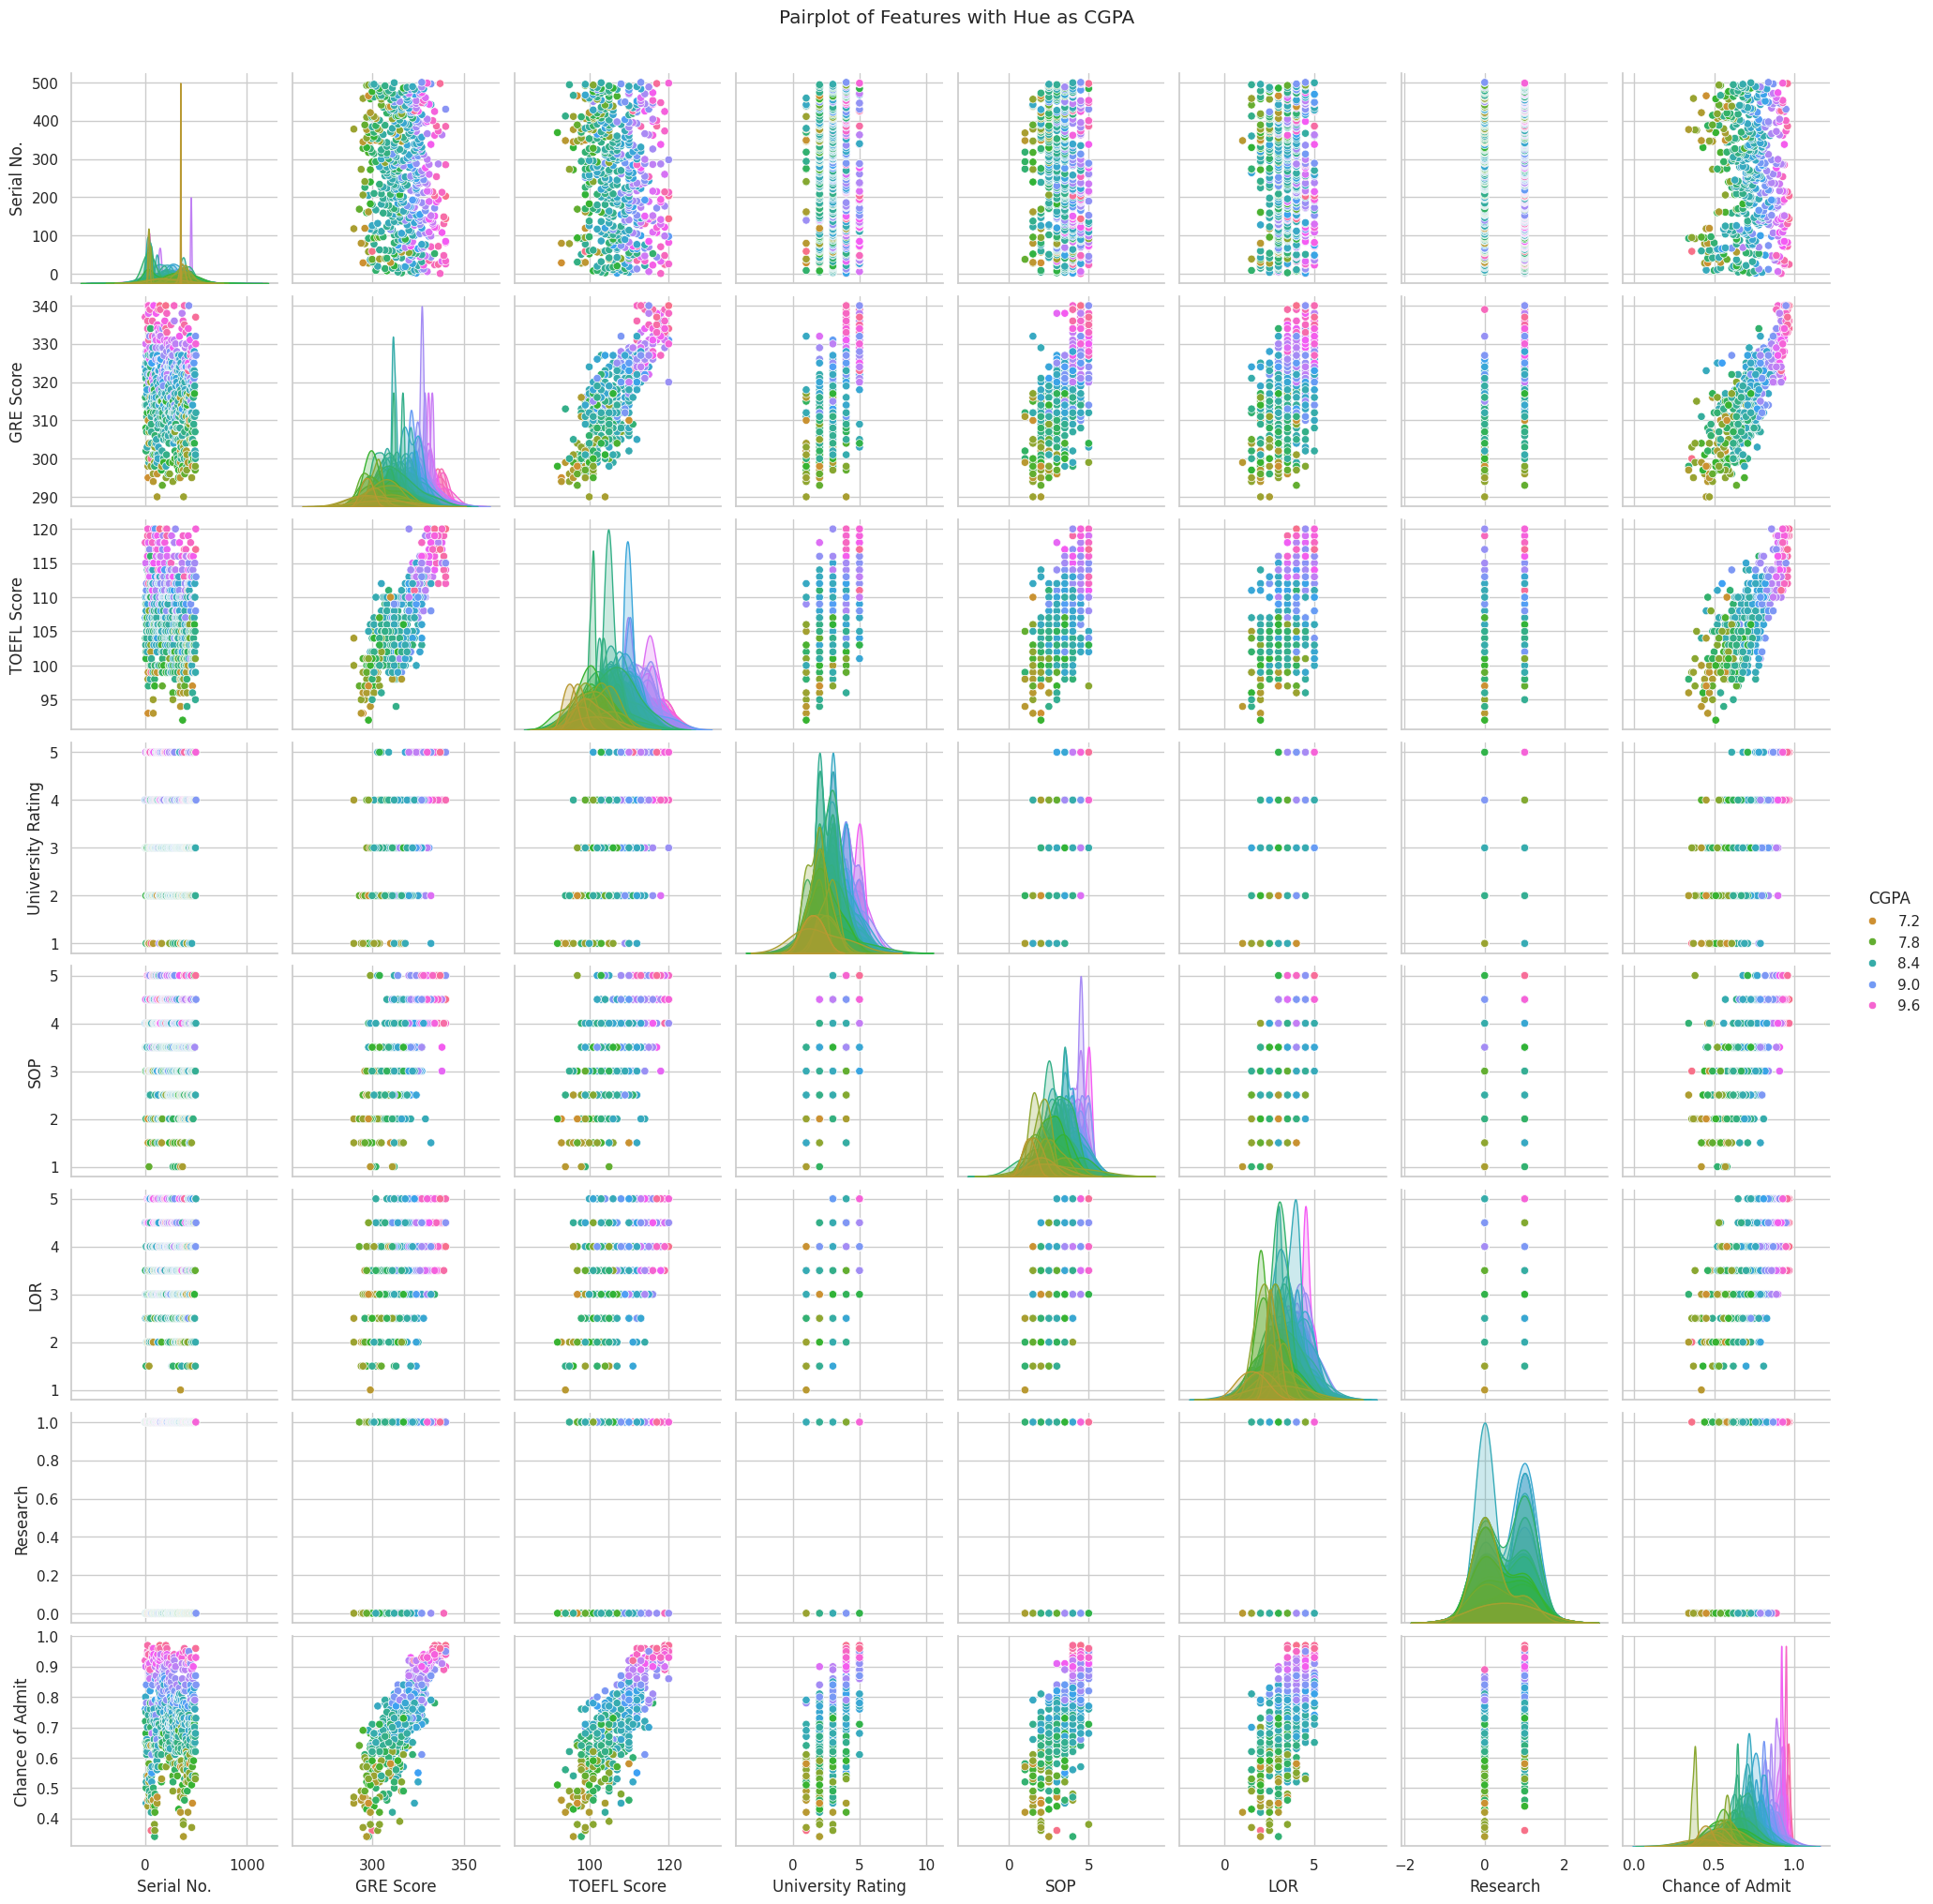

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
sns.pairplot(df, hue='CGPA', palette='husl')
plt.suptitle('Pairplot of Features with Hue as CGPA', y=1.02)
plt.show()

In [ ]:
x= df.iloc[:,1].values
y = df.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn import tree

m2=tree.DecisionTreeRegressor(criterion='squared_error',max_depth=3,random_state=1)
m2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

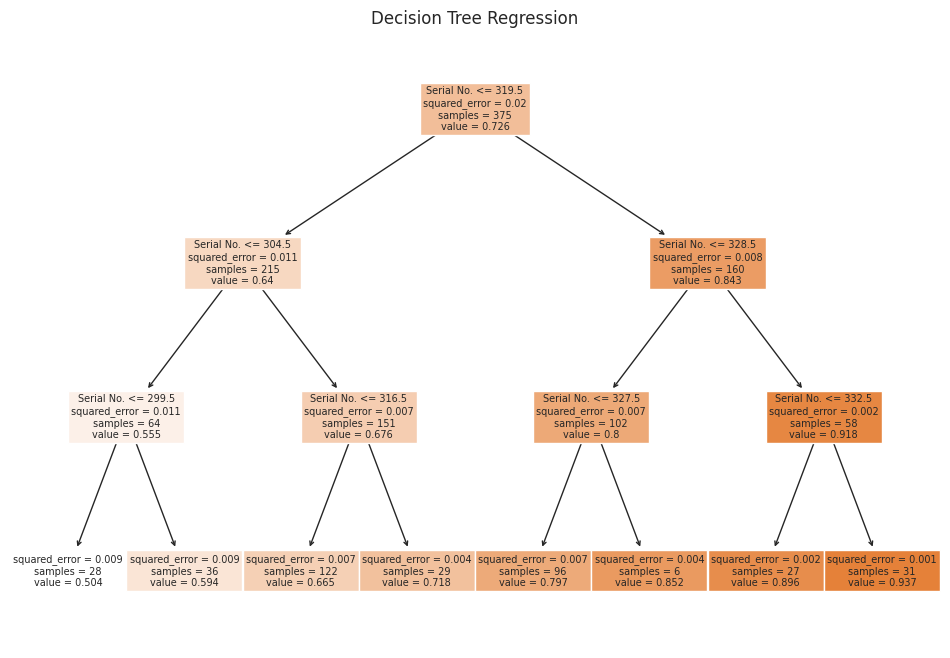

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(m2,filled=True,feature_names=df.columns,class_names=['Not Admitted','Admitted'])
plt.title('Decision Tree Regression')
plt.show()


In [ ]:
from sklearn import metrics
def errors(y_test,y_pred):
    print('MAE is',metrics.mean_absolute_error(y_test,y_pred))
    print('MSE is',metrics.mean_squared_error(y_test,y_pred))
    print('RMSE is',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('R2 score is',metrics.r2_score(y_test,y_pred))

In [ ]:
y_pred= m2.predict(X_test)
print("DECISION TREE")

errors(y_test,y_pred)

DECISION TREE
MAE is 0.06060524751675686
MSE is 0.006771964105881845
RMSE is 0.08229194435594438
R2 score is 0.6407582094991966
